<a href="https://colab.research.google.com/github/KietHuynh02/GiuaKy/blob/main/Vietnamese_Dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

folder = 'drive/MyDrive/Dishes/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Banhbo '):
    output = 1.0
  if file.startswith('Banhbotloc '):
    output = 2.0
  if file.startswith('Banhcong '):
    output = 3.0
  if file.startswith('Banhdalon '):
    output = 4.0
  if file.startswith('Banhkhot '):
    output = 5.0
  if file.startswith('Banhmi '):
    output = 6.0
  if file.startswith('Banhtaiheo '):
    output = 7.0
  if file.startswith('Banhtieu '):
    output = 8.0
  if file.startswith('Banhtrungthu '):
    output = 9.0
  if file.startswith('Banhxeo '):
    output = 10.0
  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Train
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape,labels_train.shape)

(2601, 128, 128, 3) (2601,)


In [2]:
folder = 'drive/MyDrive/Dishes_Test/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Banhbo '):
    output = 1.0
  if file.startswith('Banhbotloc '):
    output = 2.0
  if file.startswith('Banhcong '):
    output = 3.0
  if file.startswith('Banhdalon '):
    output = 4.0
  if file.startswith('Banhkhot '):
    output = 5.0
  if file.startswith('Banhmi '):
    output = 6.0
  if file.startswith('Banhtaiheo '):
    output = 7.0
  if file.startswith('Banhtieu '):
    output = 8.0
  if file.startswith('Banhtrungthu '):
    output = 9.0
  if file.startswith('Banhxeo '):
    output = 10.0
  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Test
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape,labels_test.shape)

(833, 128, 128, 3) (833,)


In [3]:
class_Dishes =    {1: 'Banhbo',2: 'Banhbotloc',3: 'Banhcong',
                  4: 'Banhdalon',5: 'Banhkhot',6: 'Banhmi',
                  7: 'Banhtaiheo',8: 'Banhtieu',9: 'Banhtrungthu',
                  10: 'Banhxeo'}

In [4]:
#Reshape the sets and rescale within the byte range
photos_train = photos_train.reshape(2601,128,128,3)
photos_train = photos_train.astype('float32')/255
photos_test = photos_test.reshape(833, 128, 128, 3)
photos_test = photos_test.astype('float32')/255

In [5]:
# One-hot encode the target classes
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [6]:
(photos_train.shape, labels_train.shape),(photos_test.shape, labels_test.shape)

(((2601, 128, 128, 3), (2601, 11)), ((833, 128, 128, 3), (833, 11)))

In [7]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epochs = 50
classes = 11

model = Sequential()
# CNN
model.add(Conv2D(32,kernel_size=(3,3), kernel_initializer='he_uniform',activation='linear',input_shape=(128,128,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))
#_________________________________________________________

model.add(Conv2D(64,(3,3), kernel_initializer='he_uniform',activation = 'relu',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#__________________________________________________________

model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(256,(3,3), kernel_initializer='he_uniform',activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(512,(3,3), kernel_initializer='he_uniform',activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
# ANN
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes ,activation = 'softmax'))

# Compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac cua ham', test_acc)
print('Ham mat mat', test_loss)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [8]:
model.save('drive/MyDrive/modelDishesVN.h5')

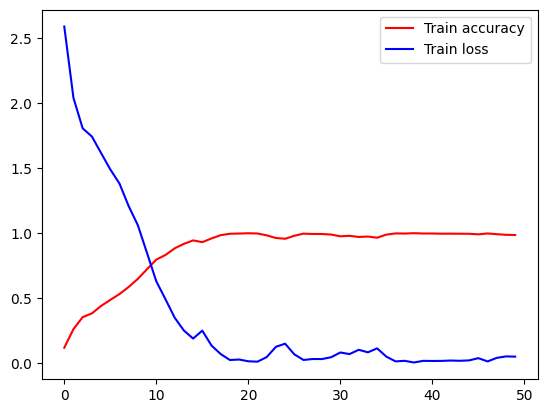

In [9]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

1/1 [==============================] - 0s 121ms/step
Predicted:  Banhxeo


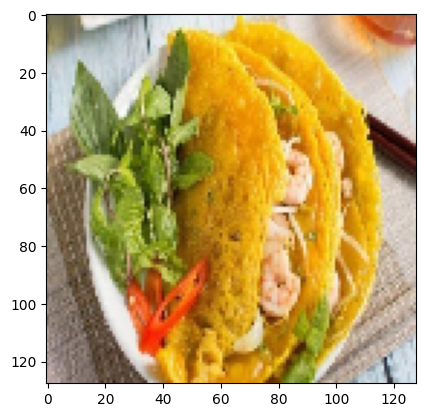

In [10]:
#test
import numpy as np 
filePath = '/content/drive/MyDrive/Banhxeo.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Dishes[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 19ms/step
Predicted:  Banhmi


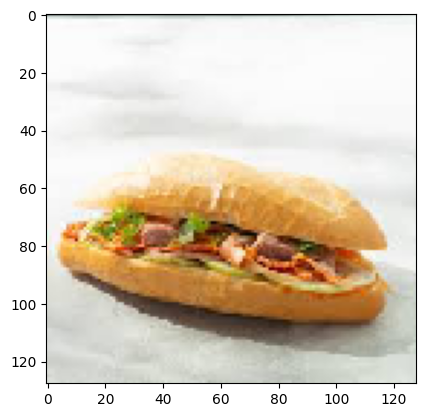

In [11]:
#test
import numpy as np 
filePath = '/content/drive/MyDrive/Banhmi.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Dishes[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 18ms/step
Predicted:  Banhbotloc


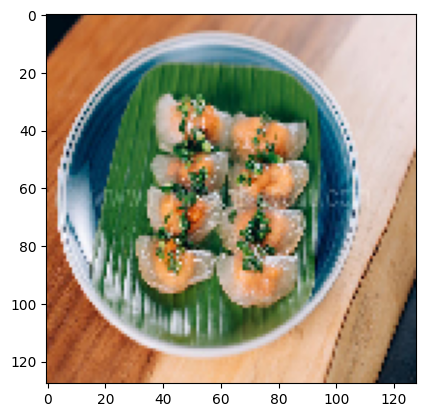

In [12]:
#test
import numpy as np 
filePath = '/content/drive/MyDrive/banhbotloc.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Dishes[pred])
plt.imshow(testImage)